<u>Objective</u>
<br>Predict 1 time step in the future

<u>Topics Covered</u>
- Our toolbox: data types
- Smoothing for prediction : averaging
- Relation between 2 variables : correlation

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab
sns.set()
pylab.rcParams['figure.figsize'] = (16.0, 5.0) # settting the default size of graphs

 # Our toolbox: data types

#### What type of data are we dealing with ? What can we do with it ?

In [109]:
fname =  "../dataset/daily_house_elec.csv"
dataframe = pd.read_csv(fname, index_col=0, parse_dates=True) # Insert your own filename

# A column (ex: "consumption") can be extracted as an object, called series:  
print('Python data type of the dataframe:', type(dataframe))
print('Python data type of a column:', type(dataframe['power_consumption']))
print("Pandas data type of columns in the dataframe:\n", dataframe.dtypes)

Python data type of the dataframe: <class 'pandas.core.frame.DataFrame'>
Python data type of a column: <class 'pandas.core.series.Series'>
Pandas data type of columns in the dataframe:
 power_consumption    float64
dtype: object


Series and DataFrames are objects from the pandas library that have very convenient methods and attributes.

Check the documentation here :

# Data Cleaning

In [150]:
df = dataframe
df['t-1'] = df.power_consumption.shift(1)
df['t-2'] = df.power_consumption.shift(2)
df['t-3'] = df.power_consumption.shift(3)
df['t-4'] = df.power_consumption.shift(4)
df['t-5'] = df.power_consumption.shift(5)
df['t-6'] = df.power_consumption.shift(6)
df['t-7'] = df.power_consumption.shift(7)

df[:8]

,power_consumption,t-1,t-2,t-3,t-4,t-5,t-6,t-7
date,,,,,,,,
2010-01-01,165.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,124.784,165.336,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,130.076,124.784,165.336,NaN,NaN,NaN,NaN,NaN
2010-01-04,144.464,130.076,124.784,165.336,NaN,NaN,NaN,NaN
2010-01-05,192.524,144.464,130.076,124.784,165.336,NaN,NaN,NaN
2010-01-06,136.970,192.524,144.464,130.076,124.784,165.336,NaN,NaN
2010-01-07,288.452,136.970,192.524,144.464,130.076,124.784,165.336,NaN
2010-01-08,184.490,288.452,136.970,192.524,144.464,130.076,124.784,165.336


In [151]:
# Oops ! Data is not "clean" anymore ...

# NaNs = null values
nulls = df.isna()
print("___For each value, is it null or not ?____ \n", nulls)

# Count all the null values
print("\n___Number of null values:___\n", nulls.sum())

___For each value, is it null or not ?____ 
             power_consumption    t-1    t-2    t-3    t-4    t-5    t-6    t-7
date                                                                          
2010-01-01              False   True   True   True   True   True   True   True
2010-01-02              False  False   True   True   True   True   True   True
2010-01-03              False  False  False   True   True   True   True   True
2010-01-04              False  False  False  False   True   True   True   True
2010-01-05              False  False  False  False  False   True   True   True
...                       ...    ...    ...    ...    ...    ...    ...    ...
2010-12-07              False  False  False  False  False  False  False  False
2010-12-08              False  False  False  False  False  False  False  False
2010-12-09              False  False  False  False  False  False  False  False
2010-12-10              False  False  False  False  False  False  False  False
2010-12

In [152]:
# exclude the part the series we cannot use
df = df[8:]
print("null values:", df.isna().sum())

null values: power_consumption    0
t-1                  0
t-2                  0
t-3                  0
t-4                  0
t-5                  0
t-6                  0
t-7                  0
dtype: int64


# Smoothing for prediction : averaging

In [153]:
# Select the rows and columns you want with iloc
# the attribute ".values" gives us a numpy array from the columns
y = df.iloc[:,:1].values
X = df.iloc[:,2:].values

# Split the data into training and test set so we can evaluate it
print("length of the dataset:", len(cons))

length of the dataset: 343


In [161]:
# 80/20 is a common train/test ratio
X_train, y_train = X[:300], y[:300]
X_test, y_test = X[300:], y[300:]

Can we infer something from this graph ?


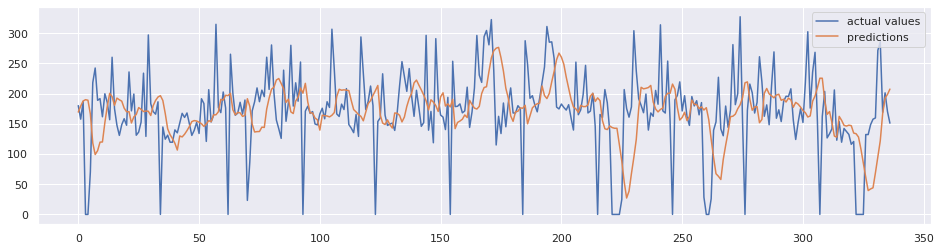

In [157]:
predictions = []

for x in X:
    pred = np.mean(x)
    predictions.append(pred)

# Let's plot and see our results !
print("Can we infer something from this graph ?")
plt.figure(figsize=(16,4))
plt.plot(y, label="actual values")
plt.plot(predictions, label="predictions")
plt.legend()

We only have a kind lagged version of the actual value.
Because we're forecasting using the average of past n values, any deviation from these values 
cannot be picked by the model.

The question is: how do we choose the time steps that can be used to predict the future ?
What time steps have a "predictive value" ?

# Relation between 2 variables : correlation

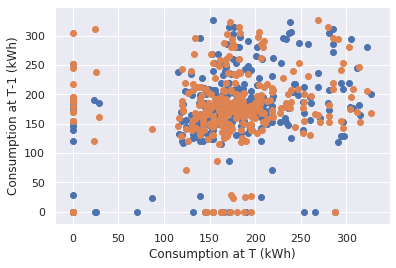

In [192]:
# Is the value at time T correlated to the value at time T-1 ?
fig = plt.figure()
scatter = plt.scatter(x=df.power_consumption, y=df['t-1'])
plt.title('')
plt.xlabel('Consumption at T (kWh)')
plt.ylabel('Consumption at T-1 (kWh)')

scatter = plt.scatter(x=df.power_consumption, y=df.power_consumption.shift(31))


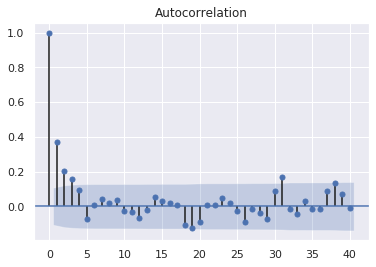

In [196]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(y, lags=40)
plt.show()

# Regression

Constant: [142.42644507]
Variables:
t-2 : 0.1653350030981854
t-3 : 0.06592324347314814
t-4 : 0.05704071616073727
t-5 : -0.1769147894791303
t-6 : -0.00020092397634374152
t-7 : 0.0718273716764076


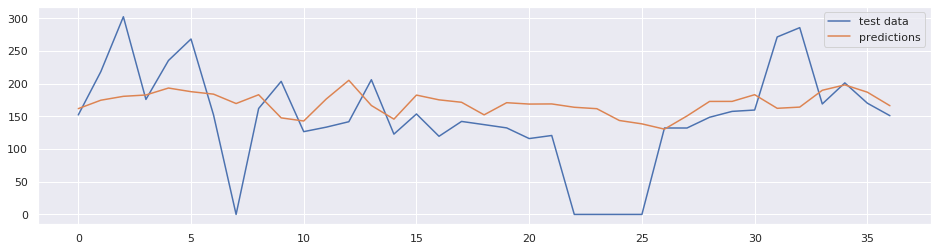

In [190]:
from sklearn.linear_model import LinearRegression

# reshape the data to make it understable for the model
# X = X.reshape(-1,1)
# y = y.reshape(-1,1)

# Fit and predict
linreg_object = LinearRegression()
model = linreg_object.fit(X_train, y_train)
pred = model.predict(X_test)

# Visualize the results: create a figure, and plot on it
plt.figure(figsize=(16,4))
plt.plot(y_test, label="test data")
plt.plot(pred, label="predictions")
plt.legend()

#model.score(test_X, test_y)
coefs = model.coef_.ravel()
print("Constant:",model.intercept_)
print("Variables:")
for i in range(0,len(coefs)) :
    print(df.columns[2:][i],":", coefs[i])

# What do you expect to see ?
# What are you actually seeing ?

In [180]:
len(model.coef_.ravel())

6

In [105]:
print(X_test[:5].ravel())
print(pred[:5].ravel())
print(X_test[:5].ravel()*0.3144+119.7)
print(y_test[:5].ravel())

[195.72  195.32  208.082 156.206 124.15 ]
[181.34300717 181.2172285  185.23019713 168.91796072 158.83805768]
[181.234368  181.108608  185.1209808 168.8111664 158.73276  ]
[195.32  208.082 156.206 124.15  152.388]


In [95]:
model.score(X, y)

0.12839796864897646

In [52]:
X = previous.values.reshape(-1,1)
y = cons.values.reshape(-1,1)

model = linreg_object.fit(X, y)

pred = 

0.13168818493177958

## Homerun questions
##### If you get these right, it's a homerun.
What happens if you feed 1-dimensional arrays to a model ?